In [1]:
import pandas as pd
import numpy as np
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-06-03 19:02:00.439188: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-03 19:02:00.439635: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 19:02:00.443479: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-03 19:02:00.493625: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-03 19:02:01.566144: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
# The path to the new_data folder
csv_folder_path = "../new_data/"

# Fetch all the csv files from the folder
csv_files = glob(csv_folder_path + "*.csv")

# Initialize lists to hold training and test data
train_data = []
test_data = []

# Process each CSV file
for file in csv_files:
    df = pd.read_csv(file)
    
    # Drop the 'timestamp' attribute
    df = df.drop(columns=['timestamp'])
    
    # Get 2200 rows from the start
    start_df = df.head(2200)
    
    # Get 2200 rows from the end
    end_df = df.tail(2200)
    
    # Get 2200 rows from the middle
    middle_index = len(df) // 2
    middle_df = df.iloc[middle_index - 1100: middle_index + 1100]
    
    # Combine the start, middle, and end data for training
    train_df = pd.concat([start_df, middle_df, end_df])
    
    # Get the rows from position 4000 to 5400 for testing
    test_df = df.iloc[4000:5400]
    
    # Append to the lists
    train_data.append(train_df)
    test_data.append(test_df)

# Concatenate all training and test data
train_data = pd.concat(train_data, ignore_index=True)
test_data = pd.concat(test_data, ignore_index=True)

# Separate the input data from the output data (label)
x_train = train_data.drop(columns=['label'])
y_train = train_data['label']
x_test = test_data.drop(columns=['label'])
y_test = test_data['label']


# Creation of the Neural Network
model = Sequential()

# Input layer with 6 neurons
model.add(Dense(6, input_dim=6))

# Hidden layer with 9 neurons and ReLU as the activation function
model.add(Dense(9, activation='relu'))

# Output layer with 12 neurons and softmax as the activation function
model.add(Dense(12, activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0055), metrics=['accuracy'])

# Train the model with validation split
history = model.fit(x_train, y_train, epochs=4, validation_split=0.1)

# Use the test set to evaluate the Neural Network
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.3f}')
print(f'Test Accuracy: {accuracy:.3f}')


# Predict the label for 10 random records
num_samples = 10

#Get 10 random indices from the x_test data set
random_indices = np.random.randint(0, len(x_test), size=num_samples)

for i, random_index in enumerate(random_indices):
    random_sample = x_test.iloc[random_index].values.reshape(1, -1)  # Reshape to match model's expected input shape
    actual_label = y_test.iloc[random_index]
    
    # Make the prediction
    prediction = model.predict(random_sample)
    predicted_label = np.argmax(prediction)
    
    # Display the random sample and the label prediction
    print(f'\nSample {i+1}:')
    print(f'Random Sample Index: {random_index}')
    print(f'Input Features: {random_sample}')
    print(f'Actual Label: {actual_label}')
    print(f'Predicted Label: {predicted_label}')
    

/home/mira/Documents/uni/12th/data_mining/Data_Mining_project/myvenv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6342 - loss: 1.1389 - val_accuracy: 0.7566 - val_loss: 1.1361
Epoch 2/4
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7711 - loss: 0.7578 - val_accuracy: 0.7729 - val_loss: 0.9847
Epoch 3/4
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7785 - loss: 0.7322 - val_accuracy: 0.7614 - val_loss: 0.6067
Epoch 4/4
4084/4084 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7824 - loss: 0.7196 - val_accuracy: 0.7413 - val_loss: 0.7744
963/963 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7522 - loss: 0.8314
Test Loss: 0.650
Test Accuracy: 0.821
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step

Sample 1:
Random Sample Index: 21790
Input Features: [[-0.9762  0.0239 -0.3691 -0.3718 -0.0037  0.9328]]
Actual Label: 6
Predicted Label: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Sample 2:
Random Sample Index: 7490
Input Features: [[-0.6875  0.1887  0.4219 -0.0625 -0.0247 -1.0938]]
Actual Label: 6
Predicted Label: 6
1/1 ━━━━━━━━━━

In [3]:
from evaluation import general_evaluation

# Predict the labels for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

general_evaluation(y_test,y_pred)

963/963 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.82

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6670
           1       0.86      0.71      0.77      2223
           2       0.00      0.00      0.00       983
           3       0.00      0.00      0.00       245
           4       0.00      0.00      0.00       571
           5       0.50      0.93      0.65      2233
           6       0.97      0.97      0.97     15174
           7       0.00      0.00      0.00         0
           8       0.74      0.70      0.72      2373
           9       0.75      0.03      0.05       221
          10       0.00      0.00      0.00        95
          11       0.00      0.00      0.00        12

    accuracy                           0.82     30800
   macro avg       0.38      0.34      0.33     30800
weighted avg       0.79      0.82      0.80     30800

Confusion Matrix:
[[ 5292   185     2     0     0  1

963/963 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


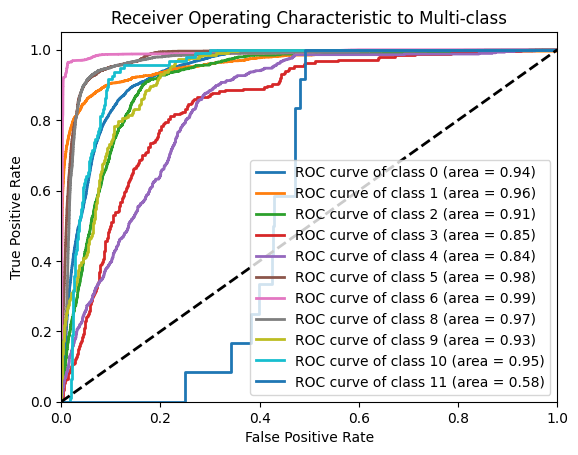

In [4]:
from evaluation import get_roc_curve

get_roc_curve(model,x_test,y_test,ifNN=True)